### data loading

In [37]:
import pandas as pd

In [42]:
df = pd.read_csv('Tweets.csv')
df.shape

(14640, 15)

In [39]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
df.airline_sentiment_confidence.min()

0.335

In [20]:
df.airline_sentiment_confidence.max()

1.0

In [ ]:
['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence','airline',
       , 'name',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
df.negativereason.value_counts() 

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

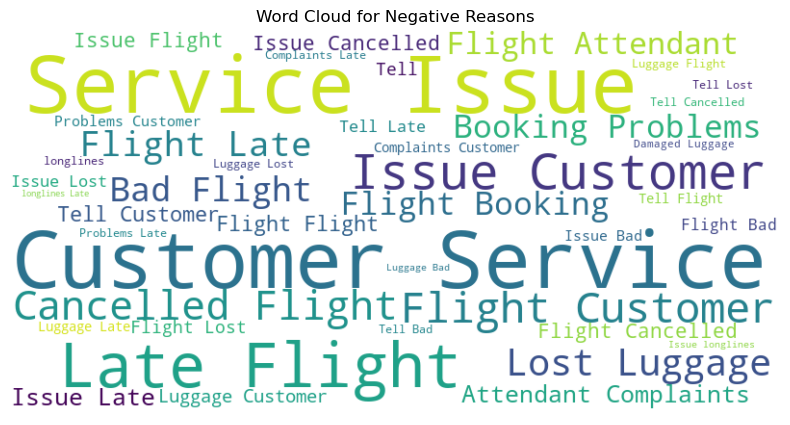

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter out rows where 'negativereason' is not null
filtered_df = df[df['negativereason'].notnull()]

# Join the text from all rows into a single string
text = ' '.join(filtered_df['negativereason'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reasons')
plt.show()

In [9]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [10]:
df.airline_sentiment_gold.value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [11]:
df.negativereason_gold.value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [12]:
df.retweet_count.value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

In [11]:
df.tweet_coord.value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: tweet_coord, Length: 832, dtype: int64

In [13]:
df.tweet_location.value_counts()

Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: tweet_location, Length: 3081, dtype: int64

In [14]:
df.user_timezone.value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Warsaw                           1
Bucharest                        1
Wellington                       1
Sarajevo                         1
Saskatchewan                     1
Name: user_timezone, Length: 85, dtype: int64

In [15]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [1]:
# Access Token = 1723378664534908928-nce0H2kebxRW7dYPVjTe0GA9jx2PeM
# Access Token Secret = IE4L9VIlmHxrODpr8XKUiBDo8oS5fVgk9l8v7bpQJa5FU

In [17]:
# Impute 'tweet_location' with a unique identifier (e.g., 'Unknown')
df['tweet_location'].fillna('Unknown', inplace=True)

# Impute 'user_timezone' with a unique identifier (e.g., 'Unknown')
df['user_timezone'].fillna('Unknown', inplace=True)

In [18]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                      0
user_timezone                       0
dtype: int64

In [43]:
import numpy as np

# Define conditions
conditions = [
    (df['airline_sentiment'] == 'negative') & (df['airline_sentiment_confidence'] >= 0.8),
    (df['airline_sentiment'] == 'negative') & (df['airline_sentiment_confidence'] < 0.8),
    (df['airline_sentiment'] == 'neutral'),
    (df['airline_sentiment'] == 'positive') & (df['airline_sentiment_confidence'] < 0.8),
    (df['airline_sentiment'] == 'positive') & (df['airline_sentiment_confidence'] >= 0.8)
]

# Define values for each condition
values = [1, 2, 3, 4, 5]

# Create 'positivity' column based on conditions
df['positivity'] = np.select(conditions, values, default=np.nan)
df['positivity'].value_counts()

1.0    7392
3.0    3099
2.0    1786
5.0    1517
4.0     846
Name: positivity, dtype: int64

In [44]:
df[df['airline_sentiment'] == 'negative'].airline_sentiment_confidence.value_counts()

1.0000    7382
0.6667      20
0.6632      18
0.6598      16
0.6559      13
          ... 
0.6413       1
0.6770       1
0.3695       1
0.6303       1
0.6440       1
Name: airline_sentiment_confidence, Length: 719, dtype: int64

In [53]:
from sklearn.utils import resample

# Separate the DataFrame into different positivity categories
df_1 = df[df['positivity'] == 1.0]
df_2 = df[df['positivity'] == 2.0]
df_3 = df[df['positivity'] == 3.0]
df_4 = df[df['positivity'] == 4.0]
df_5 = df[df['positivity'] == 5.0]

# Determine the target number of samples based on the category with the minimum count
target_samples = min(len(df_1), len(df_2), len(df_3), len(df_4), len(df_5))

# Resample each category to have the target number of samples
df_1_resampled = resample(df_1, replace=True, n_samples=target_samples, random_state=42)
df_2_resampled = resample(df_2, replace=True, n_samples=target_samples, random_state=42)
df_3_resampled = resample(df_3, replace=True, n_samples=target_samples, random_state=42)
df_4_resampled = resample(df_4, replace=True, n_samples=target_samples, random_state=42)
df_5_resampled = resample(df_5, replace=True, n_samples=target_samples, random_state=42)

# Concatenate the resampled DataFrames to create a balanced dataset
df_balanced = pd.concat([df_1_resampled, df_2_resampled, df_3_resampled, df_4_resampled, df_5_resampled])

# Shuffle the rows in the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced['positivity'].value_counts()

3.0    846
4.0    846
5.0    846
1.0    846
2.0    846
Name: positivity, dtype: int64

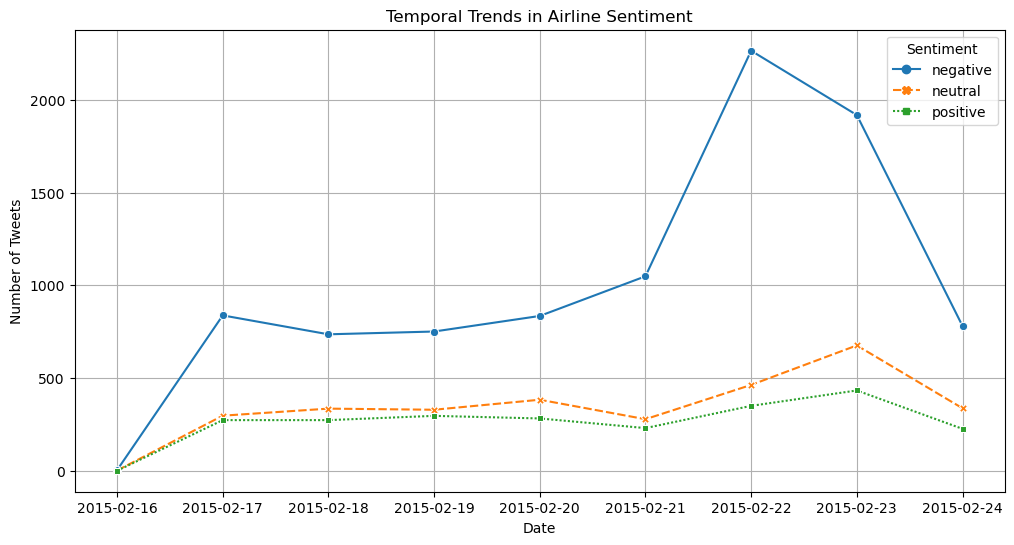

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'tweet_created' to datetime format
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Set 'tweet_created' as the index for time series analysis
df.set_index('tweet_created', inplace=True)

# Resample the data to a specific time frequency (e.g., daily)
resampled_data = df.resample('D')['airline_sentiment'].value_counts().unstack().fillna(0)

# Plot temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled_data, markers=True)
plt.title('Temporal Trends in Airline Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment', loc='upper right')
plt.grid(True)
plt.show()

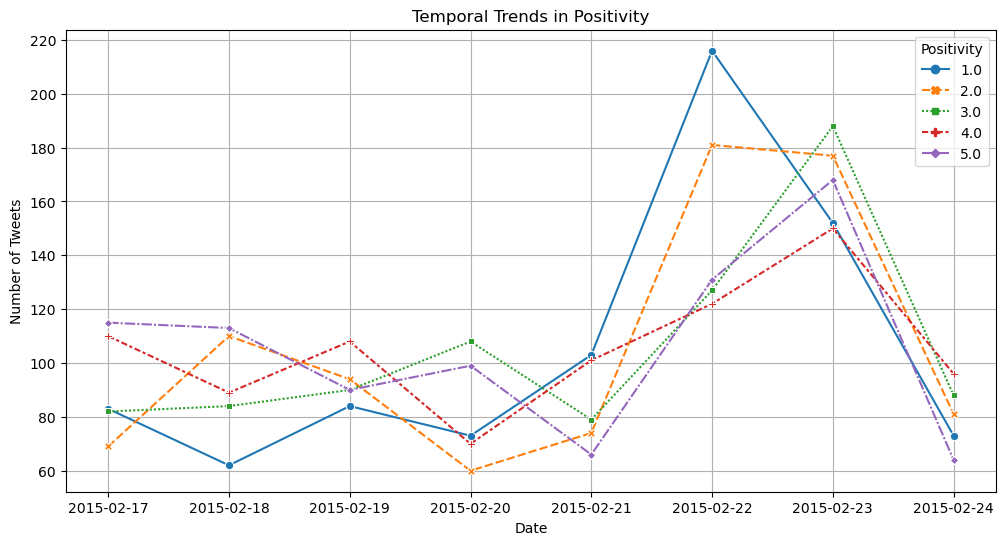

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the timestamp column is named 'tweet_created'
df_balanced['tweet_created'] = pd.to_datetime(df_balanced['tweet_created'])

# Set 'tweet_created' as the index for time series analysis
df_balanced.set_index('tweet_created', inplace=True)

# Resample the data to a specific time frequency (e.g., daily)
resampled_data_balanced = df_balanced.resample('D')['positivity'].value_counts().unstack().fillna(0)

# Plot temporal trends for positivity
plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled_data_balanced, markers=True)
plt.title('Temporal Trends in Positivity')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Positivity', loc='upper right')
plt.grid(True)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [40]:
df.tweet_created.value_counts()

2015-02-24 09:54:34 -0800    5
2015-02-24 11:43:05 -0800    4
2015-02-24 11:32:49 -0800    3
2015-02-23 10:58:58 -0800    3
2015-02-24 11:38:47 -0800    3
                            ..
2015-02-22 18:44:20 -0800    1
2015-02-22 18:42:36 -0800    1
2015-02-22 18:40:39 -0800    1
2015-02-22 18:39:11 -0800    1
2015-02-22 11:58:51 -0800    1
Name: tweet_created, Length: 14247, dtype: int64

In [47]:
df_balanced

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,positivity
0,567790133224681472,neutral,1.0000,NaN,NaN,Delta,NaN,fromtheleftseat,NaN,0,@JetBlue marks 15th birthday with @Airbus #A32...,NaN,2015-02-17 12:58:11 -0800,Phoenix AZ,Arizona,3.0
1,569911600934752256,positive,0.3493,NaN,0.0000,Delta,NaN,Dweisblum,NaN,0,"alright @JetBlue.... done! alternatively, if y...",NaN,2015-02-23 09:28:08 -0800,NEW YORK,Eastern Time (US & Canada),4.0
2,568844097374560256,positive,0.6889,NaN,NaN,United,NaN,alinosa,NaN,0,@united appreciate the sentiment and you were ...,NaN,2015-02-20 10:46:16 -0800,South Texas,Central Time (US & Canada),4.0
3,567742141334437888,neutral,0.6752,NaN,0.0000,United,NaN,MelodyKho,NaN,0,@united Confirmation number: NJV4BP - All I ne...,NaN,2015-02-17 09:47:29 -0800,"NYC, Toronto",Quito,3.0
4,568450407204139008,positive,1.0000,NaN,NaN,Delta,NaN,alexnazaryan,NaN,0,"@JetBlue Utah, I think. And thanks!",NaN,2015-02-19 08:41:53 -0800,New York City,Atlantic Time (Canada),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,570095043169529857,positive,1.0000,NaN,NaN,American,NaN,The_Playmaker20,NaN,0,@AmericanAir I love the service and cheap upgr...,NaN,2015-02-23 21:37:04 -0800,NaN,NaN,5.0
4226,567887502306050048,negative,1.0000,Late Flight,0.3516,Southwest,NaN,SunshineAlways1,NaN,0,@SouthwestAir Yes. Dale at Baggage office wa...,NaN,2015-02-17 19:25:06 -0800,NaN,Central Time (US & Canada),1.0
4227,568094342302322688,positive,0.3520,NaN,0.0000,United,NaN,mfuld,NaN,0,@united thank you. There was one here a few mo...,NaN,2015-02-18 09:07:00 -0800,"New York, NY",America/New_York,4.0
4228,567735766416392194,positive,1.0000,NaN,NaN,Southwest,NaN,andicrawford,NaN,0,.@SouthwestAir you've got a mess here at DTW b...,NaN,2015-02-17 09:22:09 -0800,Michigan,Eastern Time (US & Canada),5.0


In [48]:
df_balanced.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'positivity'],
      dtype='object')

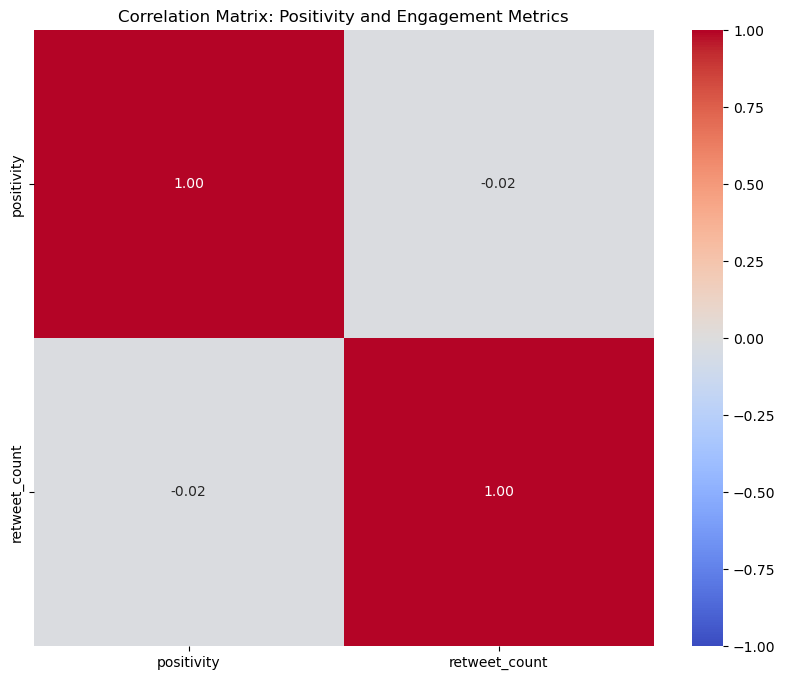

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have columns: 'positivity', 'retweet_count', 'favorite_count', 'reply_count'
# Replace these with your actual column names

# Create a subset with relevant columns
subset_columns = ['positivity', 'retweet_count']
subset_df = df_balanced[subset_columns]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix: Positivity and Engagement Metrics')
plt.show()

C:\Users\safoo\AppData\Local\Temp\ipykernel_13352\4131650466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['clean_location'] = subset_df['tweet_location'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


<Figure size 2000x800 with 0 Axes>

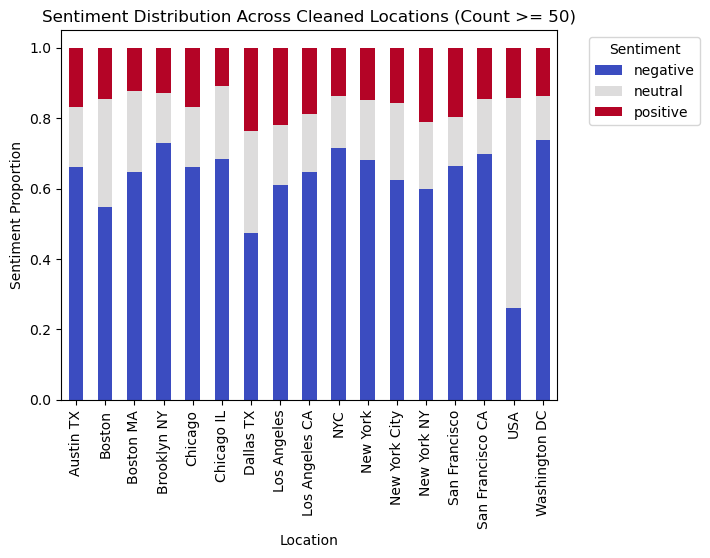

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have columns: 'airline_sentiment', 'tweet_location'
# Replace these with your actual column names

# Create a subset with relevant columns
subset_columns = ['airline_sentiment', 'tweet_location']
subset_df = df[subset_columns]

# Clean the 'tweet_location' column by removing special characters
subset_df['clean_location'] = subset_df['tweet_location'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

# Filter out locations with value counts less than 5
location_counts = subset_df['clean_location'].value_counts()
valid_locations = location_counts[location_counts >= 50].index
subset_df_filtered = subset_df[subset_df['clean_location'].isin(valid_locations) | subset_df['clean_location'].isna()]

# Group by cleaned location and calculate the average sentiment for each location
location_sentiment = subset_df_filtered.groupby('clean_location')['airline_sentiment'].value_counts(normalize=True).unstack()

# Plot a bar chart to visualize sentiment distribution across cleaned locations
plt.figure(figsize=(20, 8))
location_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution Across Cleaned Locations (Count >= 50)')
plt.xlabel('Location')
plt.ylabel('Sentiment Proportion')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\safoo\AppData\Local\Temp\ipykernel_13352\52065085.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['clean_location'] = subset_df['tweet_location'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


<Figure size 2000x800 with 0 Axes>

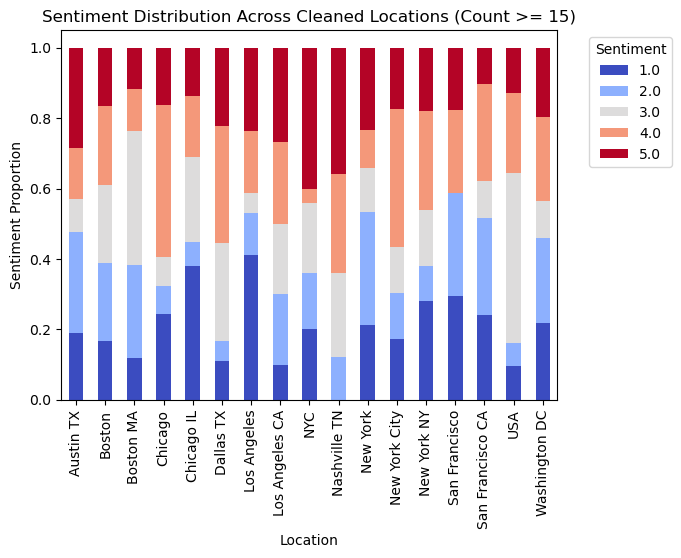

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have columns: 'airline_sentiment', 'tweet_location'
# Replace these with your actual column names

# Create a subset with relevant columns
subset_columns = ['positivity', 'tweet_location']
subset_df = df_balanced[subset_columns]

# Clean the 'tweet_location' column by removing special characters
subset_df['clean_location'] = subset_df['tweet_location'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

# Filter out locations with value counts less than 5
location_counts = subset_df['clean_location'].value_counts()
valid_locations = location_counts[location_counts >= 15].index
subset_df_filtered = subset_df[subset_df['clean_location'].isin(valid_locations) | subset_df['clean_location'].isna()]

# Group by cleaned location and calculate the average sentiment for each location
location_sentiment = subset_df_filtered.groupby('clean_location')['positivity'].value_counts(normalize=True).unstack()

# Plot a bar chart to visualize sentiment distribution across cleaned locations
plt.figure(figsize=(20, 8))
location_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution Across Cleaned Locations (Count >= 15)')
plt.xlabel('Location')
plt.ylabel('Sentiment Proportion')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()